# Milestone 2 - Understanding what Convolutional Neural Networks Learn

__Objective__: Load your trained CNN and understand what they 'see' or learn, this will help you better understand how they work.

__Workflow__:
1.  Load your trained MNIST model from Milestone 1.
2.  Analyze the models' performance by viewing the Confusion Matrix and Classification Report.
    - Closely examine the performance metrics of your trained CNN and identify its weaknesses
    - Look closely at the individual performance of each class and note classes your CNN has trouble classifying correctly. 
3.  Identify all samples wrongly classified by your CNN and display them.
    - Observe this data and intuitively think about why your CNN misclassified them.
4.  Extract our layer outputs and create our Activation Model:
    - Create an activation layer model so that you can visualize the activations of each layer.
    - This requires you to give your CNN a certain input such as an image from our test dataset. 
5.  Display the output shape o the first layer activation and compare it with the output layer shape that can be seen from displaying the model summary. 
6. Show the output of the activation map of the 4th Convolution Filter or Feature Map in the first Convolution Layer
7. Display all the activations for the first 3 layers of our Model (i.e. the two convolution layers and the max-pooling layer)
This gives a view of how an input is decomposed into the different filters learned by the network. Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.


__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take your trained MNIST model, display the classification report and confusion matrix, and then display samples wrong classified by your CNN. Next, you are to display the activation layer for various CNN layers. This will give you an understanding how and what CNNs learn will prepare you for the third milestone.

## Resources
1. Deep Learning with Python, Second Edition - [Chapter 5.4 Visualizing what convnets learn](https://livebook.manning.com/book/deep-learning-with-python/chapter-5/255
)
    
2.  [How convolutional neural networks see the world](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)

3.  [Visualizing intermediate activation in Convolutional Neural Networks with Keras](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0)



### Reload our previous model and get our MNIST dataset

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
model = load_model('mnist_simple_cnn_10_Epochs.h5')

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

2023-03-15 15:54:05.194073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 15:54:13.450552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10000 test samples


## Display the Classification Report

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

#y_pred = model.predict_classes(x_test)
predictions = model.predict(x_test) 
y_pred = np.argmax(predictions, axis=1)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 973    0    1    0    0    0    2    1    3    0]
 [   0 1127    0    4    0    1    1    0    2    0]
 [   3    4 1008    6    1    0    0    7    3    0]
 [   0    0    2  998    0

## Get the Misclassified Data

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([ 247,  259,  321,  445,  447,  449,  582,  583,  619,  659,  684,
        717,  720,  740,  883,  924,  947,  965, 1014, 1039, 1044, 1181,
       1182, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1393, 1414, 1500,
       1522, 1527, 1530, 1549, 1553, 1609, 1621, 1626, 1678, 1681, 1709,
       1790, 1878, 1901, 2035, 2043, 2053, 2093, 2098, 2109, 2118, 2129,
       2130, 2135, 2182, 2293, 2387, 2406, 2447, 2454, 2462, 2488, 2654,
       2780, 2896, 2921, 2927, 2939, 2953, 2995, 3012, 3060, 3073, 3206,
       3218, 3289, 3330, 3422, 3503, 3520, 3558, 3597, 3681, 3726, 3757,
       3767, 3808, 3853, 3906, 3941, 4065, 4075, 4078, 4163, 4176, 4224,
       4238, 4248, 4265, 4289, 4497, 4500, 4536, 4571, 4575, 4639, 4740,
       4807, 4814, 4823, 4860, 4880, 4956, 4997, 5331, 5634, 5642, 5835,
       5887, 5937, 5955, 5973, 6059, 6071, 6166, 6505, 6555, 6572, 6597,
       6651, 6847, 7434, 8059, 8094, 8246, 8311, 8520, 8527, 9009, 9015,
       9634, 9

### Reload our MNIST Dataset

In [4]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Display the Misclassified Data

1/1 [==============================] - 0s 24ms/step
9	

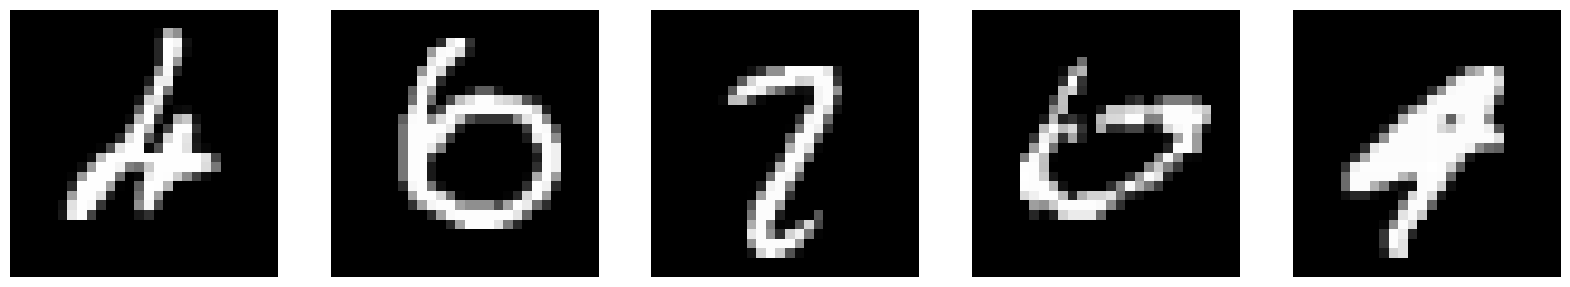

In [5]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    index = result_indices[0][i]
    plt.imshow(x_test[index,:,:,0],cmap="gray")
    plt.axis("off")
    prediction = np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
    print(prediction, end="\t")

# Viewing The Activation Maps of our CNN

## Extract our layer outputs and create our Activation Model (i.e. a model that returns the outputs of the layers)

In [6]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 7 layers
layer_outputs = [layer.output for layer in model.layers[:7]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

### Display our test image

(-0.5, 27.5, 27.5, -0.5)

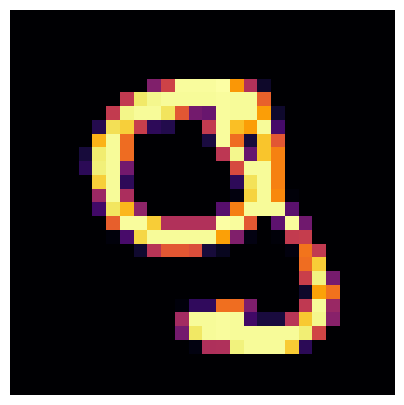

In [7]:
import matplotlib.pyplot as plt

img_tensor = x_test[151].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="inferno")
plt.axis('off')

### Running our model in predict mode to get the activation layers

When fed an image input, this model returns the values of the layer activations in the original model.

In [8]:
# Returns a list of seven Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 [==============================] - 0s 74ms/step
Number of layer activations: 7


#### The activation of the first convolution layer for the image input

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


#### Remember our Model Summary? 

The output of the first layer activation can be seen to be the same shape as the output of our first Convolution Layer. It’s a 26 × 26 feature map with 32 Conv channels. 

Let’s try plotting the fourth Conv channel/Filter of the activation of the first layer of the original model

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## The output of the 4th Conv filter in the first Conv layer

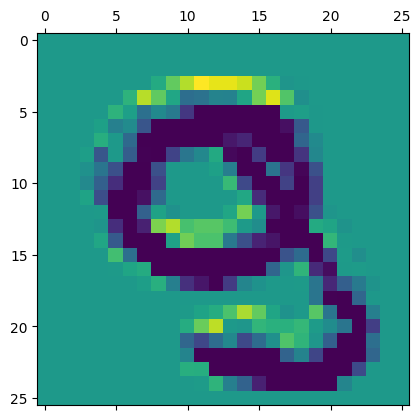

In [11]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

### Create a function that displys the activations of specific layers

In [12]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

### Display our Activations 

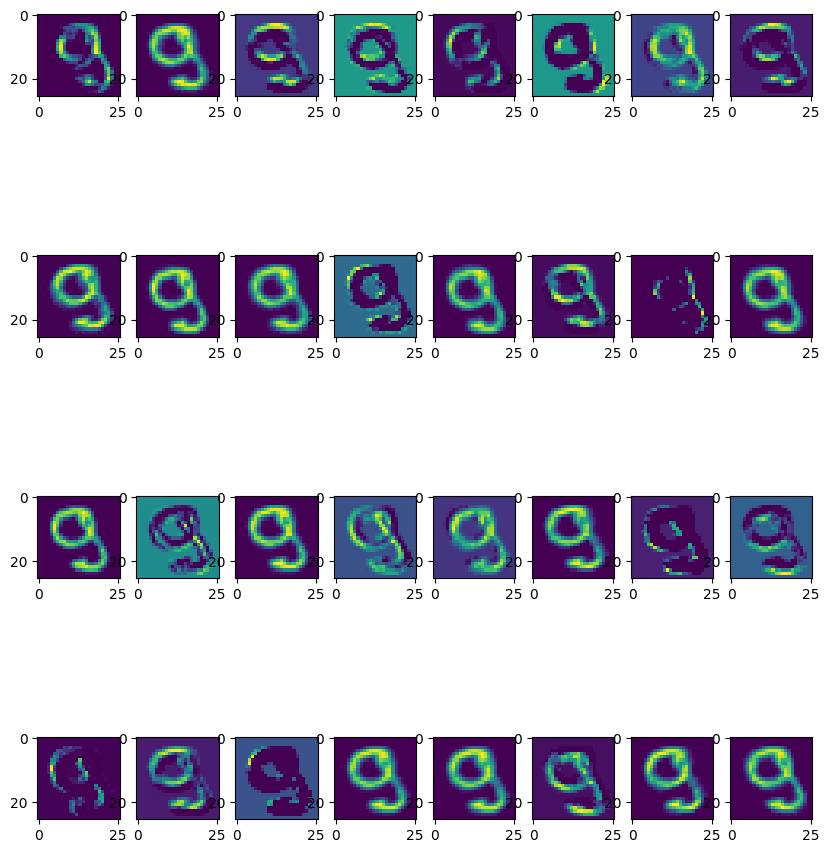

In [13]:
display_activation(activations, 8, 4, 0)

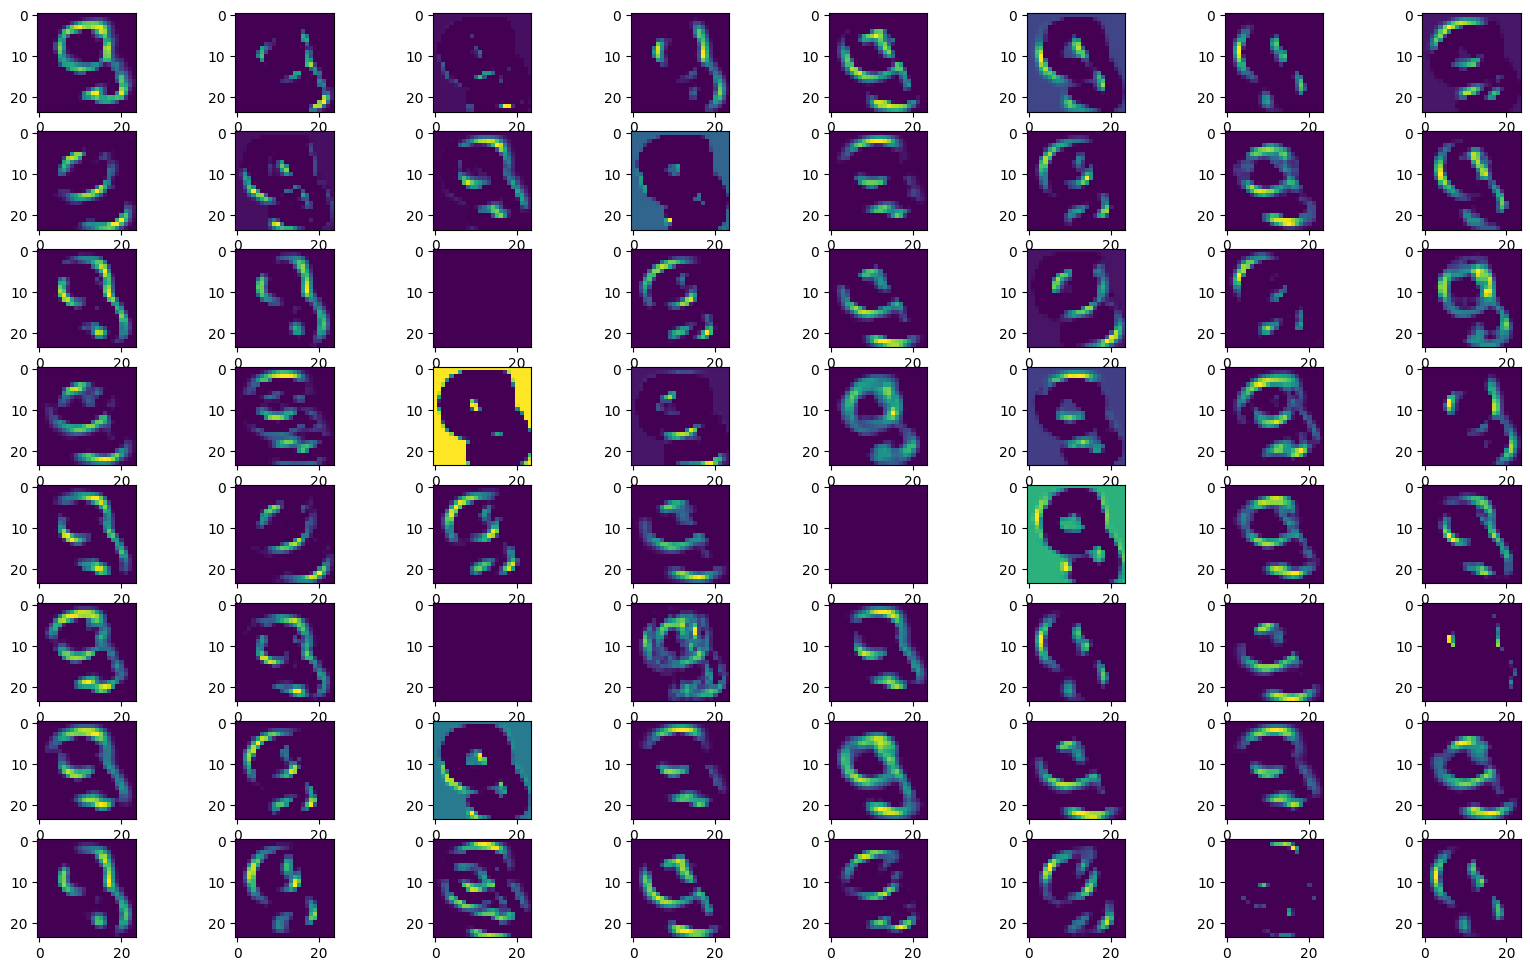

In [14]:
display_activation(activations, 8, 8, 1)

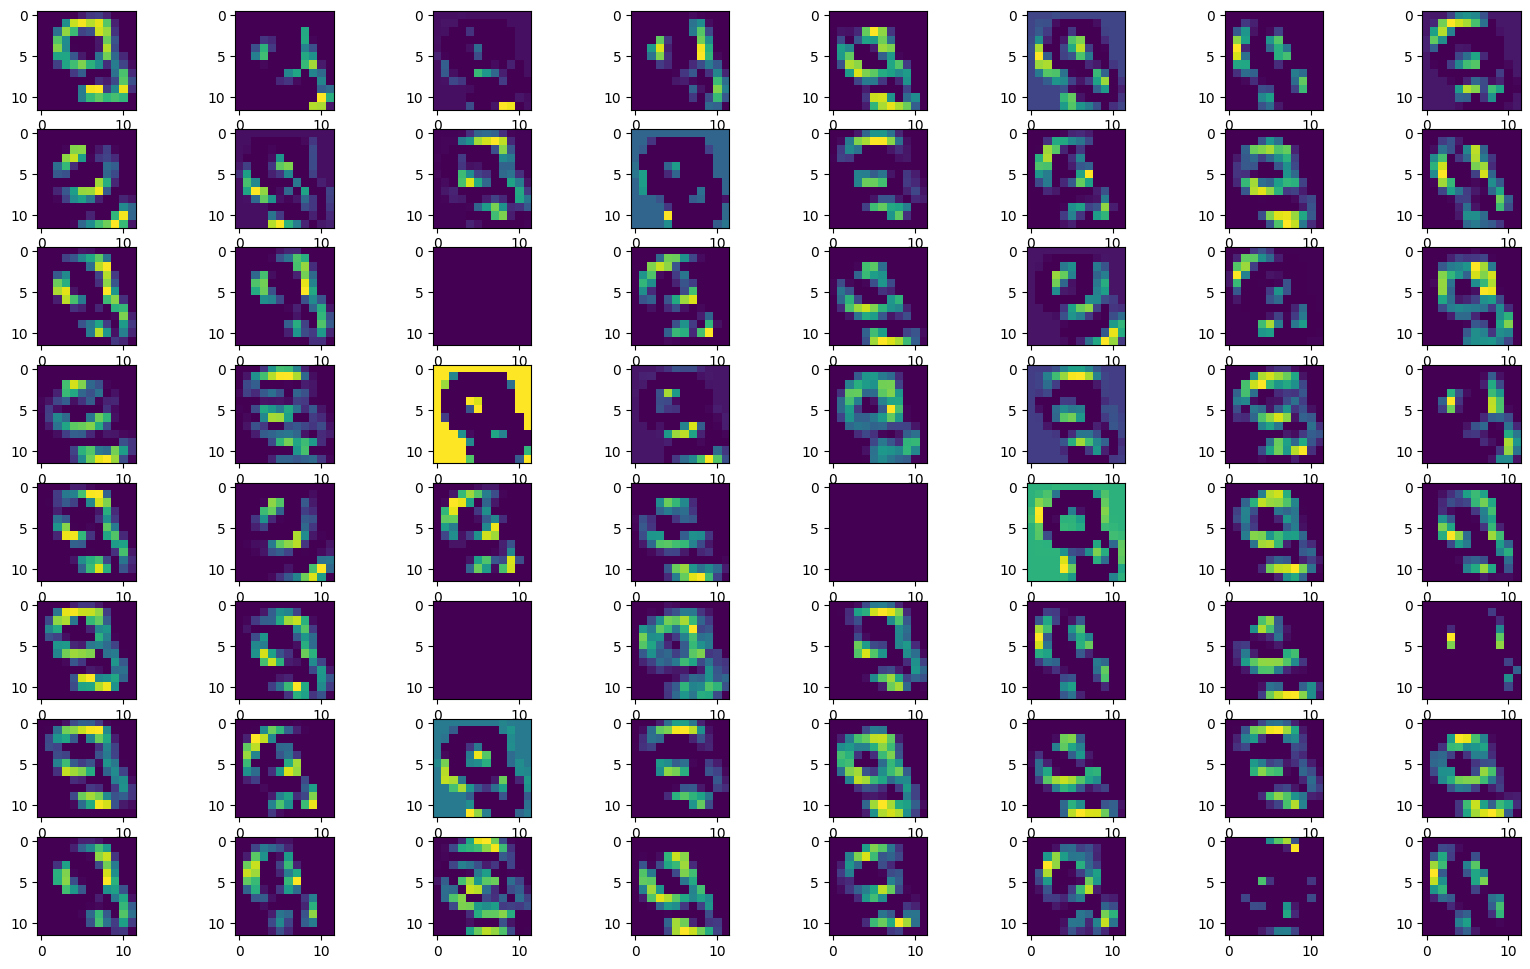

In [15]:
display_activation(activations, 8, 8, 2)

# Summary

In this notebook we:

* Loaded our trained MNIST CNN Model and evaluated its performance using the Confusion Matrix & Classification Report
* We identified the misclassified samples in the test dataset
* We viewed the Activation Maps of our CNN

The end deliverable from this section is the output of the classification report and confusion matrix. You need to display an output of wrongly classified samples from the test dataset. You also need to display the activation for the 4th Convolution Filter/Feature Map in the first Convolution Layer.
Finally, display all the activations for the first 3 layers of our Model (i.e. the two convolution layers and the max-pooling layer) 